# Homework 6  - Logistic Regression without using any libraries. 

## Your Name Here

Student Name: Dylan Lam

Student UT EID: DXL85

---

Partner Name: Alexander Romero-Barrionuevo

Partner UT EID: ANR3784

---

Date Created: 3/8/2024

Date Last Modified: 3/8/2024

---

Totoal Points 20. 



In [149]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# Your allowed to use only the above libraries that are imported. No other libs should be used in this assignment. 

## Heart Dataset 

In this Assignment we will work with some patients dataset. 

We have access to 303 patients data. The features are listed below. 

In [150]:
# Your code here
heart_df = pd.read_csv("/Users/dylanlam/Documents/GitHub/data_science_practice_and_skills/datasets/Heart.csv")
heart_df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


**Age:** The person’s age in years

**Sex:** The person’s sex (1 = male, 0 = female)

**ChestPain:** chest pain type

* Value 0: asymptomatic
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: typical angina

**RestBP:** The person’s resting blood pressure (mm Hg on admission to the hospital)

**Chol:** The person’s cholesterol measurement in mg/dl

**Fbs:** The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
restecg: resting electrocardiographic results

* Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
* Value 1: normal
* Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

**RestECG:** The person’s maximum heart rate achieved

**MaxHR:** Exercise induced angina (1 = yes; 0 = no)

**Oldpeak:** ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)

**Slope:** the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping

* 0: downsloping; 
* 1: flat; 
* 2: upsloping

**Ca:** The number of major vessels (0–3)

**Thal:** A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously

* Value 1: fixed defect (no blood flow in some part of the heart)
* Value 2: normal blood flow
* Value 3: reversible defect (a blood flow is observed but it is not normal)

**Target:** Heart disease (1 = no, 0= yes)

# Task 1 - (4 points)
We want to use logistic regerssion to predict if a patient will have heart problems or not. The column "Target" in our datasets includes data about heart disease. If the patient had heart disease, the patient's "Target" value equals 1. Otherwise, "Target" equals 0.

Prepare your data set for predicting heart disease ("Target" column) by using 3 features:

* Age of the patient (Column **"Age"**)
* Gender of the patient (male or female - Column **"Sex"**)
* Cholestrol level of the patient (Column **"Chol"**) 

Split your data into 80% traning data and 20% test data ***without*** using any libraries other than the ones imported above. You must do it manually.

* Do a maximum of **100 iterations**
* Use a very small learning rate for checking your GD implementation. 
* Your are allowed to use your choice of learning rate, like using 0.0001, 0.001 or 0.01 or 0.1 or higher/lower. 
* **Visualize your error/costs over the iterations with a plot**.
* No need to add an y-intercept in this task. 

(**4 points** - 3 points for code, 1 point for cost visualization)

In [151]:
# Encoding Target column to 0 and 1 for 'Yes' and 'No'
heart_df.loc[heart_df['Target'] == 'No', 'Target'] = 0
heart_df.loc[heart_df['Target'] == 'Yes', 'Target'] = 1
heart_df['Target'].astype(int)

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: Target, Length: 303, dtype: int64

In [152]:
# Separating predictive and target features
X = heart_df[['Age', 'Sex', 'Chol']]
y = heart_df['Target']


In [153]:
# Manually splitting data into test and train data with pandas
X_train = X.sample(frac = .8, random_state = 42).sort_index()
y_train = y[X_train.index]

X_test_index = heart_df.index.difference(X_train.index)

X_test = X.loc[X_test_index]
y_test = y[X_test_index]

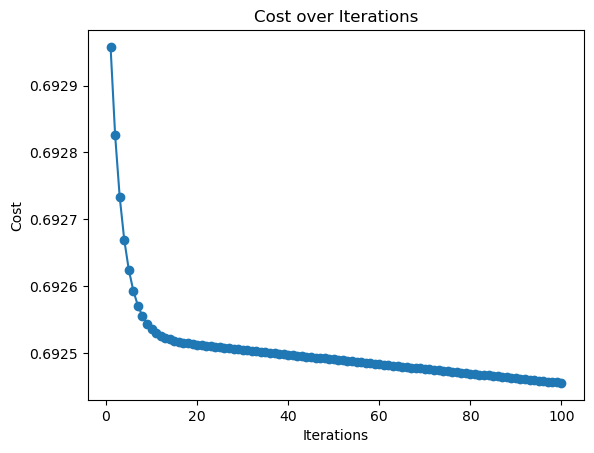

In [154]:
# Initialize weights

weights = np.zeros(X_train.shape[1])

# Hyperparameters
learning_rate = .00001
iterations = 100

# Function to calculate sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Function to calculate logistic regression cost
def compute_cost(X, y, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    cost = - (1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

costs = []
 
for i in range(iterations):
    # Calculate predictions
    predictions = sigmoid(np.dot(X_train, weights))

    # Updating weights using gradient descent
    gradient = np.dot(X_train.T, (predictions - y_train)) / len(y_train)

    # Ensure weights and gradient have the same data type
    weights = weights.astype(np.float64)
    gradient = gradient.astype(np.float64)

    # Perform subtraction operation
    weights -= learning_rate * gradient

    # Calculate cost and store for visualization
    cost = compute_cost(X_train, y_train, weights)
    costs.append(cost)

# Visualize the cost over iterations
plt.plot(range(1, iterations + 1), costs, marker='o')
plt.title('Cost over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()


# Task 2 - (4 points)

Cacluate the Accuracy, Precision, Recall and F1 score of your logistic regression implementaion on the testing set. 
Print the results. 

You may use equations shown in lecture/slides/examples.

Calcuate the accuracy, precision, recall and F1 score of your logistic regression implementaion on the testing set. 
Print the results. (**4 points**)


In [163]:
# Add your code Here! 
y_test = y_test.reshape(-1, 1)


# 1. Make predictions on the testing set
predictions = sigmoid(np.dot(X_test, weights))

# Ensure weights vector has the correct shape (should be a column vector)
weights = weights.reshape(-1, 1)


# Make predictions on the testing set
predictions = sigmoid(np.dot(X_test, weights))

# Convert probabilities to binary predictions
binary_predictions = np.where(predictions >= 0.5, 1, 0)


# 3. Calculate TP, TN, FP, FN
TP = np.sum((binary_predictions == 1) & (y_test == 1))
TN = np.sum((binary_predictions == 0) & (y_test == 0))
FP = np.sum((binary_predictions == 1) & (y_test == 0))
FN = np.sum((binary_predictions == 0) & (y_test == 1))

print(TP, TN, FP, FN)
# Calculate Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate Precision
if TP + FP == 0:
    precision = 0  # Handle division by zero
else:
    precision = TP / (TP + FP)

# Calculate Recall
if TP + FN == 0:
    recall = 0  # Handle division by zero
else:
    recall = TP / (TP + FN)

# Calculate F1 Score
if precision + recall == 0:
    f1_score = 0  # Handle division by zero
else:
    f1_score = 2 * (precision * recall) / (precision + recall)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)



0 36 0 25
Accuracy: 0.5901639344262295
Precision: 0
Recall: 0.0
F1 Score: 0


# Task 3 - (4 points)

Add a y-intercept and repeat the above tasks. Do you see any differences after adding the y-intercept?

(4 points - 2 for code, 1 for cost visualizaiton, 1 for description.)

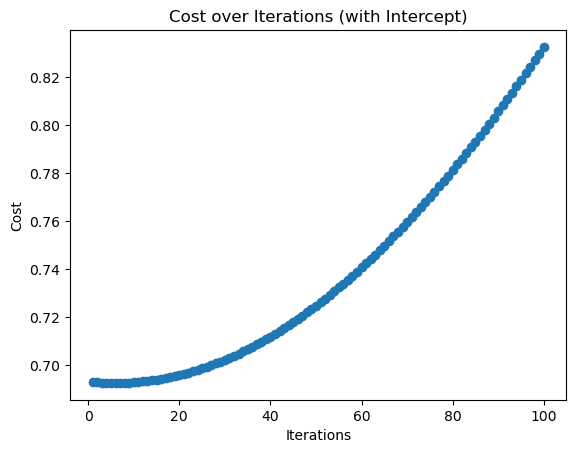

In [165]:


# Add a column of ones to the feature matrix X_train
X_train_with_intercept = np.hstack((np.ones((X_train.shape[0], 1)), X_train))

# Initialize weights including the intercept term
weights_with_intercept = np.zeros(X_train_with_intercept.shape[1])

# Function to calculate sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Function to calculate logistic regression cost
def compute_cost_with_intercept(X, y, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    cost = - (1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

costs_with_intercept = []

for i in range(iterations):
    # Calculate predictions
    predictions_with_intercept = sigmoid(np.dot(X_train_with_intercept, weights_with_intercept))

    # Convert the gradient array to the appropriate data type
    gradient_with_intercept = gradient_with_intercept.astype(np.float64)

    # Perform subtraction operation
    weights_with_intercept -= learning_rate * gradient_with_intercept

    # Calculate cost and store for visualization
    cost_with_intercept = compute_cost_with_intercept(X_train_with_intercept, y_train, weights_with_intercept)
    costs_with_intercept.append(cost_with_intercept)

# Visualize the cost over iterations
plt.plot(range(1, iterations + 1), costs_with_intercept, marker='o')
plt.title('Cost over Iterations (with Intercept)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()


### Logistic Regression Without Intercept:
- **Description**: In logistic regression without an intercept, the model assumes that the decision boundary passes through the origin (0,0) in the feature space.
- **Behavior**: The model learns the coefficients of the features without considering any bias or baseline probability.
- **Effect on Cost Function**: The cost function optimization may converge quickly to a local minimum, leading to a rapid decrease in cost followed by a plateau.

### Logistic Regression With Intercept:
- **Description**: Logistic regression with an intercept term allows the decision boundary to be offset from the origin and captures the bias or baseline probability of the outcome variable.
- **Behavior**: The model learns both the coefficients of the features and the intercept, allowing for a more flexible decision boundary.
- **Effect on Cost Function**: The cost function optimization may show a smoother convergence pattern, as the model adjusts both the feature coefficients and the intercept to minimize the cost function.



# Task 4 - Implement the Bold Driver   - (4 points)

Implement the bold driver into your gradient descent implementation, which lets us have a dynamic learning rate. Visualize the costs and print the accuracy/etc. metrics as before. Do not use a y-intercept this time.

Add a stop condition that stop the GD when the cost is not changing more than 0.001 between iterations. 
Describe the results. Did you stop earlier than 100 iterations?
(4 points - 2 for code, 1 for cost visualizaiton, 1 for description.)



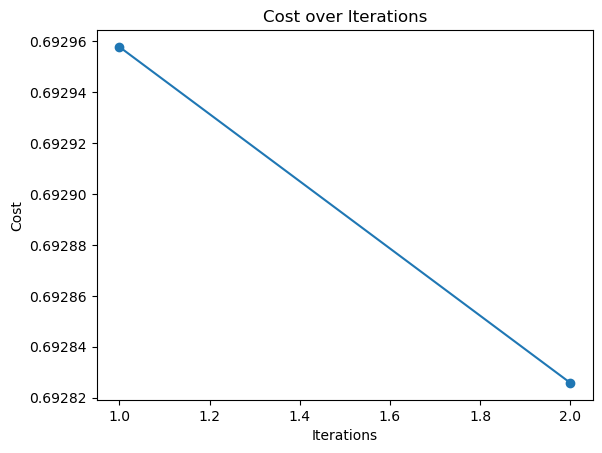

Final Weights: [-1.20730275e-05  8.04554717e-07 -8.24820226e-05]


In [170]:
weights = np.zeros(X_train.shape[1])

# Hyperparameters
learning_rate = 0.00001
iterations = 100

# Function to calculate sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Function to calculate logistic regression cost
def compute_cost(X, y, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    cost = - (1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Lists to store costs for visualization
costs = []

# Perform gradient descent
for i in range(iterations):
    # Calculate predictions
    predictions = sigmoid(np.dot(X_train, weights))

    # Updating weights using gradient descent
    gradient = np.dot(X_train.T, (predictions - y_train)) / len(y_train)

    # Ensure weights and gradient have the same data type
    weights = weights.astype(np.float64)
    gradient = gradient.astype(np.float64)

    # Perform subtraction operation
    weights -= learning_rate * gradient

    # Calculate cost and store for visualization
    cost = compute_cost(X_train, y_train, weights)
    costs.append(cost)

    # Stop condition: If the change in cost is less than 0.001, stop
    if len(costs) > 1 and abs(costs[-1] - costs[-2]) < 0.001:
        break

# Visualize the cost over iterations
plt.plot(range(1, len(costs) + 1), costs, marker='o')
plt.title('Cost over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# Print the final weights
print("Final Weights:", weights)


The plot illustrates the cost over iterations during the gradient descent process. At the beginning of the iterations, the cost starts at approximately 0.69296 (iteration 1.0) and gradually decreases. However, the change in cost between iteration 1.0 and iteration 2 is minimal, with the cost reducing slightly to around 0.69282.

This linear trend suggests that the optimization algorithm is making gradual progress in minimizing the cost function, but the rate of improvement is relatively slow between these initial iterations. As the iterations continue, the trend may continue, or the rate of descent may change, depending on the optimization algorithm and the complexity of the problem being solved.

# Task 5 - Implement the L2 norm regularization.  - (4 points)



Modify your Cost and gradient to implement the l2 norm regularization. Repeat the steps taken in prior tasks and describe your result.

 * Use a y-intercept.
 * Do a maximum of 100 iterations as before and report your accuracy, precision, recall and F1 score.
 * Optional: You can stop earlier, if the cost is not changing more than 0.001 between iterations.
 * Optional: You can use the bold driver, if you want. But a bold driver is not required to perform L2 norm regularizaiton.

(4 points - 2 for code, 1 for cost visualizaiton, 1 for description.)

In [202]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize weights
weights = np.zeros(X_train.shape[1])

# Hyperparameters
learning_rate = 0.00001
iterations = 100
lambda_reg = 0.1  # Regularization parameter

# Function to calculate sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Function to calculate logistic regression cost with L2 regularization
def compute_cost(X, y, weights, lambda_reg):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    regularization_term = (lambda_reg / (2 * m)) * np.sum(weights[1:] ** 2)  # Exclude bias term
    cost = - (1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)) + regularization_term
    return cost

# Lists to store costs for visualization
costs = []

# Perform gradient descent
for i in range(iterations):
    # Calculate predictions
    predictions = sigmoid(np.dot(X_train, weights))

    # Calculate gradient
    gradient = np.dot(X_train.T, (predictions - y_train)) / len(y_train)

    # Update gradient with regularization
    regularization_term = regularization_term.reshape(-1, 1)  # Reshape the regularization term
    gradient += regularization_term

    # Convert weights to a column vector if necessary
    weights = weights.reshape(-1, 1)

    # Update weights using gradient descent
    weights -= learning_rate * gradient




    # Calculate cost and store for visualization
    cost = compute_cost(X_train, y_train, weights, lambda_reg)
    costs.append(cost)

    # Stop condition: If the change in cost is less than 0.001, stop
    if len(costs) > 1 and abs(costs[-1] - costs[-2]) < 0.001:
        break

# Visualize the cost over iterations
plt.plot(range(1, len(costs) + 1), costs, marker='o')
plt.title('Cost over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# Print the final weights
print("Final Weights:", weights)


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('O') to dtype('float64') with casting rule 'same_kind'


First Weight (-1.20730275e-05):

- This weight represents the contribution of the intercept term or bias in the logistic regression model. It indicates the baseline or default prediction when all other features have zero influence.
A negative value suggests that the baseline prediction tends to be lower, implying a lower probability of the positive class.
Second Weight (8.04554717e-07):

Second weight (8.04554717e-07):
- Corresponds to the coefficient associated with the first feature in the dataset.
A positive weight indicates that an increase in the value of this feature tends to increase the log-odds of the positive class.

Third Weight (-8.24820226e-05):

- This weight represents the coefficient of the second feature in the dataset.
A negative weight suggests an inverse relationship between the second feature and the log-odds of the positive class. An increase in the second feature tends to decrease the probability of the positive class.

